## **EDUCATION: ARTIFICIAL INTELLIGENCE (AI) IN HIGHER EDUCATION**

**Dataset:**
Yilmaz, N. & Şekeroğlu, B. (2019). Higher Education Students Performance Evaluation [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51G82.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
df = pd.read_csv("higheduc.csv")

In [28]:
column_names = ["Student Age", "Sex", "Graduated High School Type", "Scholarship Type", "Additional Work", 
                "Regular Artistic or Sports Activity", "Do you have a partner", "Total Salary", "Transportation", 
                "Accommodation Type", "Mother's Education", "Father's Education", "Number of Siblings", 
                "Parental Status", "Mother's Occupation", "Father's Occupation", "Weekly Study Hours", 
                "Reading Frequency (Non-Scientific)", "Reading Frequency (Scientific)", "Seminar Attendance", 
                "Project Impact", "Class Attendance", "Midterm Preparation 1", "Midterm Preparation 2", 
                "Taking Notes", "Listening in Classes", "Discussion Impact", "Flip-Classroom", 
                "CGPA Last Semester", "Expected CGPA", "Course ID", "Grade"]
df.columns = ["Student ID"] + column_names

In [29]:
df.head()

,Student ID,Student Age,Sex,Graduated High School Type,Scholarship Type,Additional Work,Regular Artistic or Sports Activity,Do you have a partner,Total Salary,Transportation,...,Midterm Preparation 1,Midterm Preparation 2,Taking Notes,Listening in Classes,Discussion Impact,Flip-Classroom,CGPA Last Semester,Expected CGPA,Course ID,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Student ID                           145 non-null    object
 1   Student Age                          145 non-null    int64 
 2   Sex                                  145 non-null    int64 
 3   Graduated High School Type           145 non-null    int64 
 4   Scholarship Type                     145 non-null    int64 
 5   Additional Work                      145 non-null    int64 
 6   Regular Artistic or Sports Activity  145 non-null    int64 
 7   Do you have a partner                145 non-null    int64 
 8   Total Salary                         145 non-null    int64 
 9   Transportation                       145 non-null    int64 
 10  Accommodation Type                   145 non-null    int64 
 11  Mother's Education                   145 non-

In [31]:
df.isnull().sum()

Student ID                             0
Student Age                            0
Sex                                    0
Graduated High School Type             0
Scholarship Type                       0
Additional Work                        0
Regular Artistic or Sports Activity    0
Do you have a partner                  0
Total Salary                           0
Transportation                         0
Accommodation Type                     0
Mother's Education                     0
Father's Education                     0
Number of Siblings                     0
Parental Status                        0
Mother's Occupation                    0
Father's Occupation                    0
Weekly Study Hours                     0
Reading Frequency (Non-Scientific)     0
Reading Frequency (Scientific)         0
Seminar Attendance                     0
Project Impact                         0
Class Attendance                       0
Midterm Preparation 1                  0
Midterm Preparat

In [32]:
df_viz = df.copy()

# Define the mapping dictionary based on the provided class labels
column_mappings = {
    "Student Age": {
        1: "18-21",
        2: "22-25",
        3: "above 26"
    },
    "Sex": {
        1: "female",
        2: "male"
    },
    "Graduated High School Type": {
        1: "private",
        2: "state",
        3: "other"
    },
    "Scholarship Type": {
        1: "None",
        2: "25%",
        3: "50%",
        4: "75%",
        5: "Full"
    },
    "Additional Work": {
        1: "Yes",
        2: "No"
    },
    "Regular Artistic or Sports Activity": {
        1: "Yes",
        2: "No"
    },
    "Do you have a partner": {
        1: "Yes",
        2: "No"
    },
    "Total Salary": {
        1: "USD 135-200",
        2: "USD 201-270",
        3: "USD 271-340",
        4: "USD 341-410",
        5: "above 410"
    },
    "Transportation": {
        1: "Bus",
        2: "Private car/taxi",
        3: "bicycle",
        4: "Other"
    },
    "Accommodation Type": {
        1: "rental",
        2: "dormitory",
        3: "with family",
        4: "Other"
    },
    "Mother's Education": {
        1: "primary school",
        2: "secondary school",
        3: "high school",
        4: "university",
        5: "MSc.",
        6: "Ph.D."
    },
    "Father's Education": {
        1: "primary school",
        2: "secondary school",
        3: "high school",
        4: "university",
        5: "MSc.",
        6: "Ph.D."
    },
    "Number of Siblings": {
        1: "1",
        2: "2",
        3: "3",
        4: "4",
        5: "5 or above"
    },
    "Parental Status": {
        1: "married",
        2: "divorced",
        3: "died - one of them or both"
    },
    "Mother's Occupation": {
        1: "retired",
        2: "housewife",
        3: "government officer",
        4: "private sector employee",
        5: "self-employment",
        6: "other"
    },
    "Father's Occupation": {
        1: "retired",
        2: "government officer",
        3: "private sector employee",
        4: "self-employment",
        5: "other"
    },
    "Weekly Study Hours": {
        1: "None",
        2: "<5 hours",
        3: "6-10 hours",
        4: "11-20 hours",
        5: "more than 20 hours"
    },
    "Reading Frequency (Non-Scientific)": {
        1: "None",
        2: "Sometimes",
        3: "Often"
    },
    "Reading Frequency (Scientific)": {
        1: "None",
        2: "Sometimes",
        3: "Often"
    },
    "Seminar Attendance": {
        1: "Yes",
        2: "No"
    },
    "Project Impact": {
        1: "positive",
        2: "negative",
        3: "neutral"
    },
    "Class Attendance": {
        1: "always",
        2: "sometimes",
        3: "never"
    },
    "Midterm Preparation 1": {
        1: "alone",
        2: "with friends",
        3: "not applicable"
    },
    "Midterm Preparation 2": {
        1: "closest date to the exam",
        2: "regularly during the semester",
        3: "never"
    },
    "Taking Notes": {
        1: "never",
        2: "sometimes",
        3: "always"
    },
    "Listening in Classes": {
        1: "never",
        2: "sometimes",
        3: "always"
    },
    "Discussion Impact": {
        1: "never",
        2: "sometimes",
        3: "always"
    },
    "Flip-Classroom": {
        1: "not useful",
        2: "useful",
        3: "not applicable"
    },
    "CGPA Last Semester": {
        1: "<2.00",
        2: "2.00-2.49",
        3: "2.50-2.99",
        4: "3.00-3.49",
        5: "above 3.49"
    },
    "Expected CGPA": {
        1: "<2.00",
        2: "2.00-2.49",
        3: "2.50-2.99",
        4: "3.00-3.49",
        5: "above 3.49"
    },
    "Grade": {
        0: "Fail",
        1: "DD",
        2: "DC",
        3: "CC",
        4: "CB",
        5: "BB",
        6: "BA",
        7: "AA"
    }
}

# Apply mappings to each column in df_viz
for col, mapping in column_mappings.items():
    if col in df_viz.columns:
        df_viz[col] = df_viz[col].map(mapping).astype("category")
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping...")

# Verify the transformed DataFrame
print("\nVisualization DataFrame Sample:")
df_viz.head()


Visualization DataFrame Sample:


,Student ID,Student Age,Sex,Graduated High School Type,Scholarship Type,Additional Work,Regular Artistic or Sports Activity,Do you have a partner,Total Salary,Transportation,...,Midterm Preparation 1,Midterm Preparation 2,Taking Notes,Listening in Classes,Discussion Impact,Flip-Classroom,CGPA Last Semester,Expected CGPA,Course ID,Grade
0,STUDENT1,22-25,male,other,50%,Yes,No,No,USD 135-200,Bus,...,alone,closest date to the exam,always,sometimes,never,useful,<2.00,<2.00,1,DD
1,STUDENT2,22-25,male,other,50%,Yes,No,No,USD 135-200,Bus,...,alone,closest date to the exam,always,sometimes,always,useful,2.00-2.49,2.50-2.99,1,DD
2,STUDENT3,22-25,male,state,50%,No,No,No,USD 201-270,Other,...,alone,closest date to the exam,sometimes,sometimes,never,not useful,2.00-2.49,2.00-2.49,1,DD
3,STUDENT4,18-21,female,private,50%,Yes,No,Yes,USD 201-270,Bus,...,alone,regularly during the semester,always,sometimes,sometimes,not useful,2.50-2.99,2.00-2.49,1,DD
4,STUDENT5,22-25,male,private,50%,No,No,Yes,USD 271-340,Bus,...,with friends,closest date to the exam,sometimes,sometimes,sometimes,not useful,2.00-2.49,2.00-2.49,1,DD


C:\Users\Aircom\AppData\Local\Temp\ipykernel_27720\4253782669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_viz, x="Grade", palette="viridis", order=["Fail", "DD", "DC", "CC", "CB", "BB", "BA", "AA"])


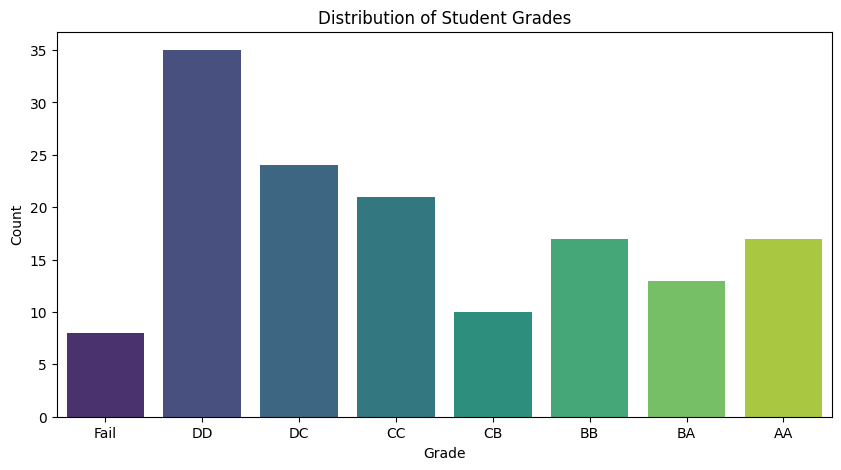

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_viz, x="Cum", palette="viridis", order=["Fail", "DD", "DC", "CC", "CB", "BB", "BA", "AA"])
plt.title("Distribution of Student Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

C:\Users\Aircom\AppData\Local\Temp\ipykernel_27720\1576313355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x="Student Age", y="Grade", palette="Set2")


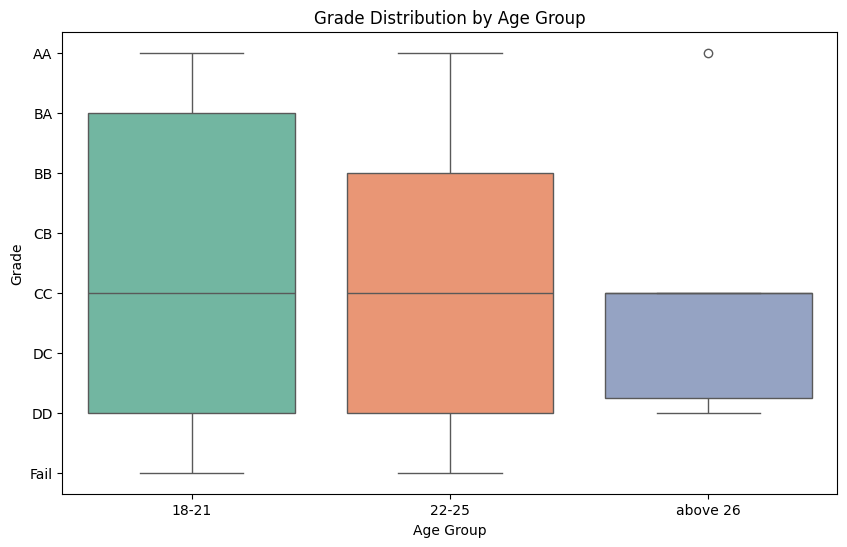

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_viz, x="Student Age", y="Grade", palette="Set2")
plt.title("Grade Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Grade")
plt.show()

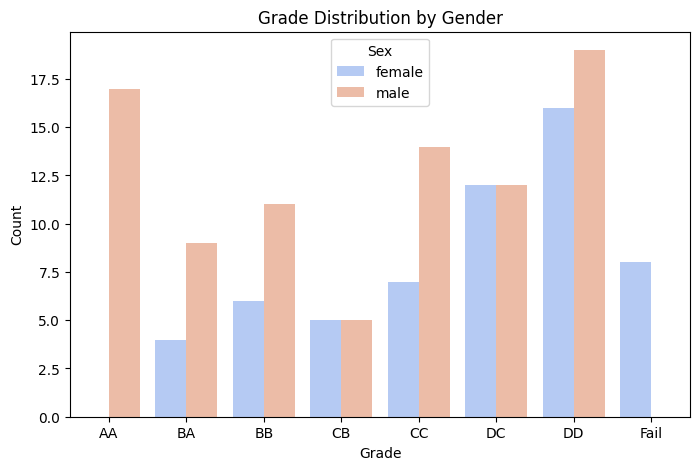

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_viz, x="Grade", hue="Sex", palette="coolwarm")
plt.title("Grade Distribution by Gender")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show()

C:\Users\Aircom\AppData\Local\Temp\ipykernel_27720\3806802758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


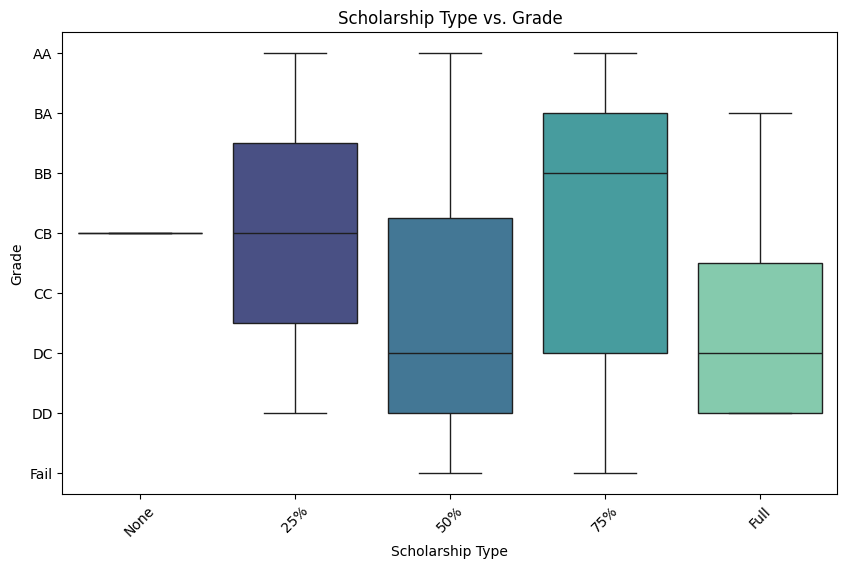

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_viz,
    x="Scholarship Type",
    y="Grade",
    order=["None", "25%", "50%", "75%", "Full"],
    palette="mako"
)
plt.title("Scholarship Type vs. Grade")
plt.xlabel("Scholarship Type")
plt.ylabel("Grade")
plt.xticks(rotation=45)
plt.show()

C:\Users\Aircom\AppData\Local\Temp\ipykernel_27720\2428217795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_viz['Weekly Study Hours'], y=df_viz['Grade'], palette="coolwarm", order=study_hours_order)


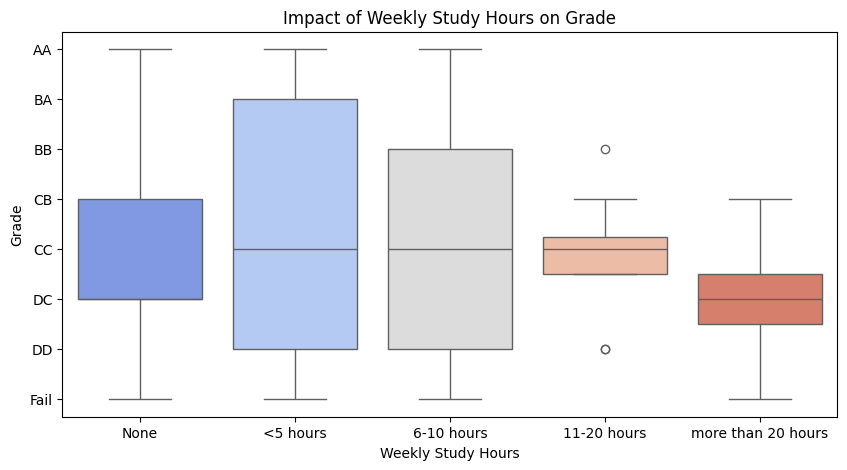

In [37]:
plt.figure(figsize=(10, 5))
study_hours_order = ["None", "<5 hours", "6-10 hours", "11-20 hours", "more than 20 hours"]
sns.boxplot(x=df_viz['Weekly Study Hours'], y=df_viz['Grade'], palette="coolwarm", order=study_hours_order)
plt.title("Impact of Weekly Study Hours on Grade")
plt.xlabel("Weekly Study Hours")
plt.ylabel("Grade")
plt.show()

C:\Users\Aircom\AppData\Local\Temp\ipykernel_27720\1146552044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_viz['Class Attendance'], y=df_viz['Grade'], palette="magma")


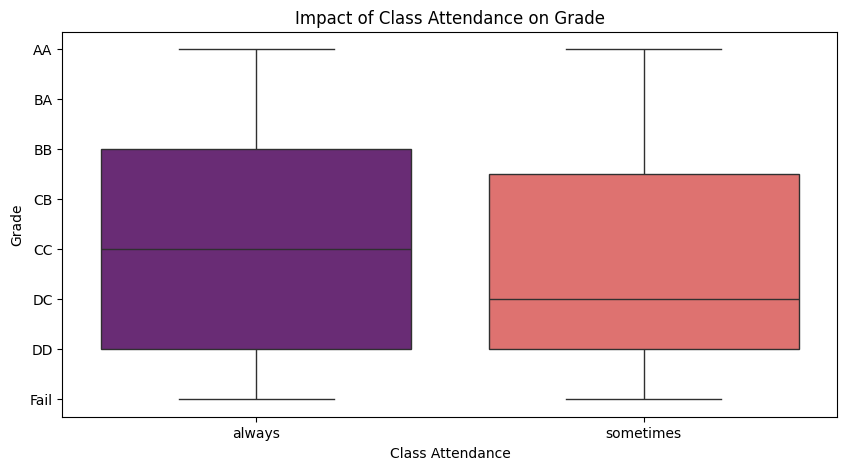

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_viz['Class Attendance'], y=df_viz['Grade'], palette="magma")
plt.title("Impact of Class Attendance on Grade")
plt.xlabel("Class Attendance")
plt.ylabel("Grade")
plt.show()

In [39]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Generation of Machine Learning Models

In [ ]:
X = df.drop(columns=["Grade", "Student ID", "Course ID"])  
y = df["Grade"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Scaling of the data

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression model

In [43]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")

Logistic Regression Accuracy: 0.2069


Support Vector Machine Model

In [44]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

SVM Accuracy: 0.2069


Random forest model

In [45]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Accuracy: 0.1724


In [46]:
models = {"Logistic Regression": y_pred_log, "SVM": y_pred_svm, "Random Forest": y_pred_rf}
best_model = max(models, key=lambda model: accuracy_score(y_test, models[model]))
print(f"Best Model: {best_model}")

Best Model: Logistic Regression


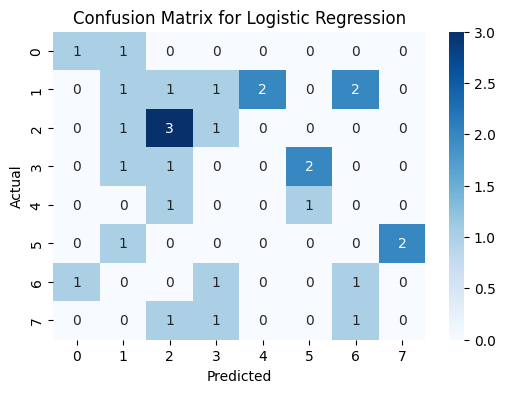

In [47]:
best_preds = models[best_model]
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model}')
plt.show()


In [48]:
print(classification_report(y_test, best_preds))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.20      0.14      0.17         7
           2       0.43      0.60      0.50         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         3

    accuracy                           0.21        29
   macro avg       0.17      0.20      0.18        29
weighted avg       0.18      0.21      0.19        29



In [52]:
models = {'Logistic Regression': LogisticRegression(),
          'Random Forest Classifier': RandomForestClassifier(),
          'Support Vector Machine': SVC()}

In [55]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{model_name} Cross-validation MSE: {np.mean(cv_scores)}")

c:\Users\Aircom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aircom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Cross-validation MSE: -7.16551724137931
Random Forest Classifier Cross-validation MSE: -7.765517241379311
Support Vector Machine Cross-validation MSE: -8.124137931034483
